# **Seaborn** : 

Aussi utilisée pour la visualisation des données, **Seaborn** offre une syntaxe beaucoup plus compacte que la bibliothèque *Matplolib*. De plus, sa richesse est aussi dû à sa compatibilité avec les objects de **Pandas** (séries et dataframes) qui permettent l'étiquetage des données et à une analyse statistique plus  sophistiquée.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importation des données (format csv)

In [3]:
dataframe = pd.read_csv("OrderLine_v4.csv", encoding = "latin1")
# Afficher les 5 première ligne de la dataframe
dataframe.head()

,orderIdentifier,orderLineNumber,orderType,product.partNumber,shipFromInstructionLocation.locationIdentifier,shipToLocation.locationIdentifier,status,createdDate,requestedShipDate,requestedDeliveryDate,plannedShipDate,plannedDeliveryDate,quantity,quantityUnits,productValue,value,valueCurrency,shipmentCount
0,100044323,100,OUTBOUND,PS-SL-B122,LT-2,FAA - Washington,NaN,2021-07-20T00:00:00,2021-08-31T00:00:00,2021-09-06T00:00:00,2021-09-03T00:00:00,2021-09-06T00:00:00,250,EA,1250,312500,USD,NaN
1,100044323,200,OUTBOUND,PS-SL-KIT,LT-2,FAA - Washington,NaN,2021-07-20T00:00:00,2021-08-31T00:00:00,2021-09-06T00:00:00,2021-09-03T00:00:00,2021-09-06T00:00:00,250,EA,0,0,USD,NaN
2,100044323,300,OUTBOUND,PS-SL-INFO,LT-2,FAA - Washington,NaN,2021-07-20T00:00:00,2021-08-31T00:00:00,2021-09-06T00:00:00,2021-09-03T00:00:00,2021-09-06T00:00:00,250,EA,0,0,USD,NaN
3,100044324,100,OUTBOUND,PS-SL-F343,LT-2,FAA - Washington,NaN,2021-07-20T00:00:00,2021-08-19T00:00:00,2021-08-22T00:00:00,2021-08-19T00:00:00,2021-08-22T00:00:00,132,EA,1250,165000,USD,NaN
4,100044324,200,OUTBOUND,PS-SL-KIT,LT-2,FAA - Washington,NaN,2021-07-20T00:00:00,2021-08-19T00:00:00,2021-08-22T00:00:00,2021-08-19T00:00:00,2021-08-22T00:00:00,132,EA,0,0,USD,NaN


In [27]:
# Afficher les étiquettes des colonnes du dataset (jeu de données)
print(dataframe.columns)

Index(['orderIdentifier', 'orderLineNumber', 'orderType', 'product.partNumber',
       'shipFromInstructionLocation.locationIdentifier',
       'shipToLocation.locationIdentifier', 'status', 'createdDate',
       'requestedShipDate', 'requestedDeliveryDate', 'plannedShipDate',
       'plannedDeliveryDate', 'quantity', 'quantityUnits', 'productValue',
       'value', 'valueCurrency', 'shipmentCount'],
      dtype='object')


In [28]:
# Information sur la dataframe  (les types des variables)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   orderIdentifier                                 352 non-null    int64  
 1   orderLineNumber                                 352 non-null    int64  
 2   orderType                                       352 non-null    object 
 3   product.partNumber                              352 non-null    object 
 4   shipFromInstructionLocation.locationIdentifier  352 non-null    object 
 5   shipToLocation.locationIdentifier               352 non-null    object 
 6   status                                          0 non-null      float64
 7   createdDate                                     352 non-null    object 
 8   requestedShipDate                               352 non-null    object 
 9   requestedDeliveryDate                      

# Graphique d'une distribution des variables (valeurs) quantitatives

## Histogramme

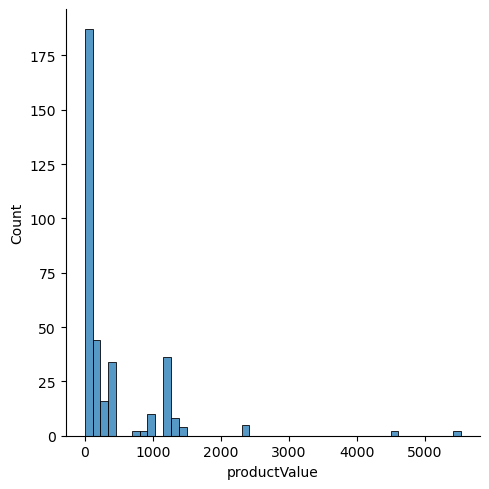

In [29]:
sns.displot(dataframe.productValue) # productValue est l'étiquette de la colonne que l'on souhaite représenter graphiquement
# On peut se passer de la méthode show() de matplotlib
plt.show()
# En abscisse se trouve les tranches des valeurs de la colonne dont on souhaite représenter
# En ordonnée les fréquences absolues observées

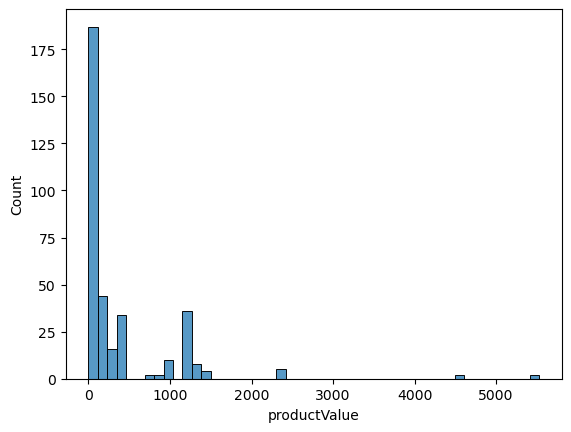

In [30]:
# On peut obtenir le même Histogramme avec la méthode "histplot()" de Seaborn
sns.histplot(dataframe.productValue)
plt.show()

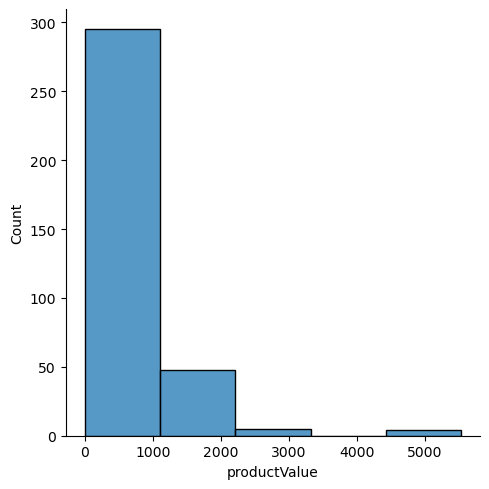

In [31]:
# On peut spécifier le nombre des tranches d'intervalles (bins)
sns.displot(dataframe.productValue, bins = 5)
plt.show()

### L'estimatio de la distribution d'une variable quantitative : 

Le pramètre **kde** = **True**. (KDE : Kernel Density Estimation = Estimation de Densité par Noyau)

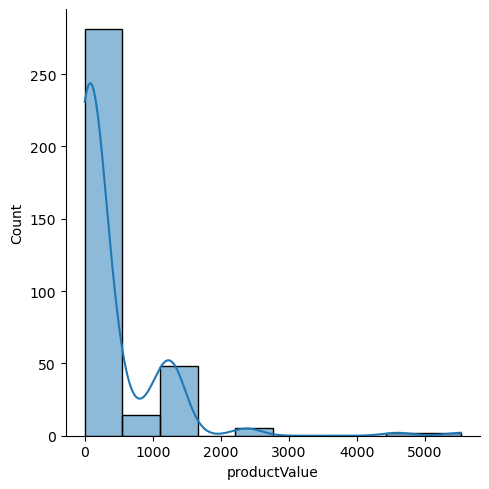

In [37]:
sns.displot(dataframe.productValue, bins = 10, kde = True)

# Les boîtes à moustaches (boxplot) : 
le premier paramètre est **l'étiquette de la colonne** de la variable quantitative et le second paramètre est la **dataframe**

<Axes: xlabel='productValue'>

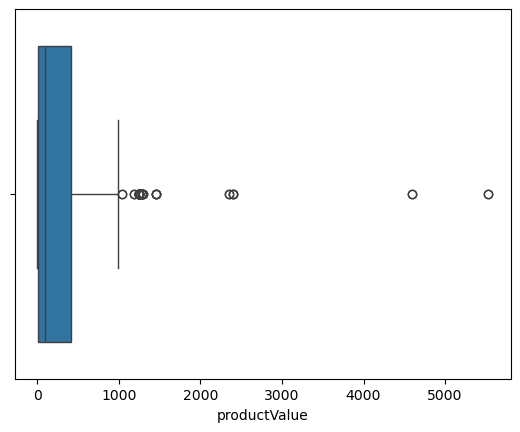

In [4]:
# Afficher les valeurs sur l'axe des abscisses avec l'argument 'x' = nomColonne
sns.boxplot(x = "productValue", data = dataframe)

<Axes: ylabel='productValue'>

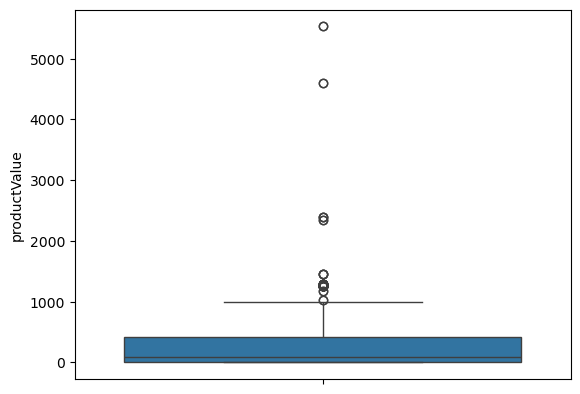

In [5]:
# Afficher les valeurs sur l'axe des ordonnées 'y' = nomColonne
sns.boxplot(y = "productValue", data = dataframe)

**Remarques** : La lecture d'une boîte à moustache s'effectue comme présenté dans le notebook consacré à l'introduction à **matplotlib** vue précédemment. De plus, les petits cercles supplémentaires qui s'affichent représentent les valeurs abérantes (**outliers**)

# Combinaison du boxplot et du KDE ( = Violin plot) : 
La méthode **violinplot()** de *Seaborn* est une alternative au **boxplot**, qui affiche la distribution complète des données en ajoutant une estimation de densité (KDE). Elle permet de mieux comprendre la répartition des valeurs et l’asymétrie.
**Résultat** : 
- Chaque violin représente la distribution des longueurs de bec (bill_length_mm) par espèce (species).
- Plus la forme est large, plus les valeurs sont fréquentes à cet endroit.
- La ligne centrale indique la médiane.

<Axes: xlabel='productValue'>

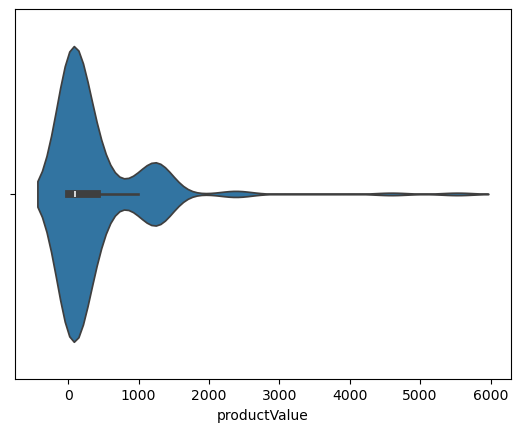

In [8]:
# Afficher les valeurs sur l'axe des abscisses 'x' = nomColonne
sns.violinplot(x = "productValue", data = dataframe)

<Axes: ylabel='productValue'>

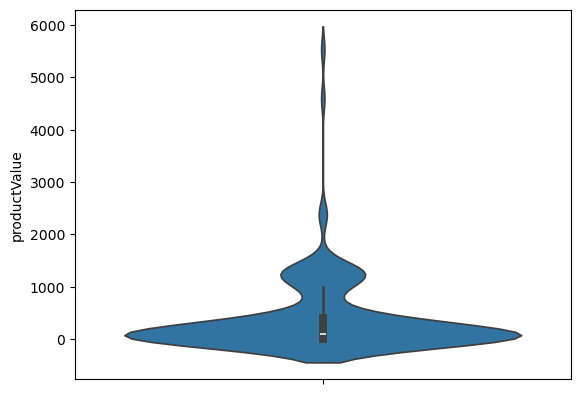

In [9]:
# Afficher les valeurs sur l'axe des ordonnées 'y' = nomColonne
sns.violinplot(y = "productValue", data = dataframe)

# Afficher un pseudo-nuage des points pour distinguer les catégries

<Axes: xlabel='productValue'>

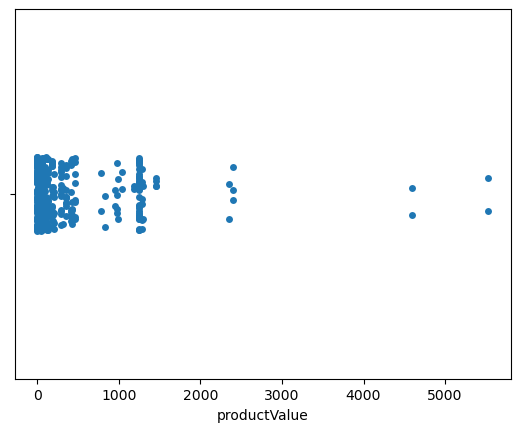

In [10]:
# Afficher les valeurs sur l'axe des abscisses 'x' = nomColonne
sns.stripplot(x = "productValue", data = dataframe)

<Axes: ylabel='productValue'>

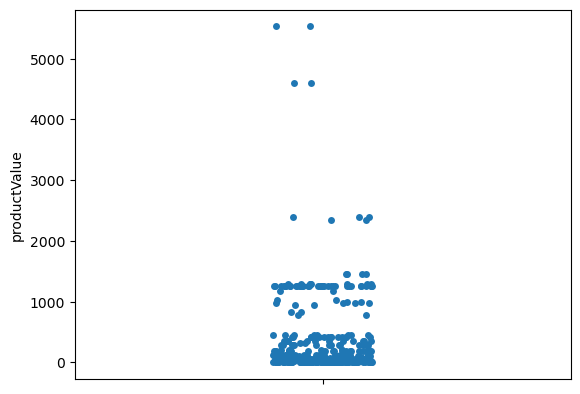

In [11]:
# Afficher les valeurs sur l'axe des ordonnées 'y' = nomColonne
sns.stripplot(y = "productValue", data = dataframe)

# Afficher la moyenne et l'intervalle de confiance (pour la moyenne et de nveau 95%)

<Axes: xlabel='productValue'>

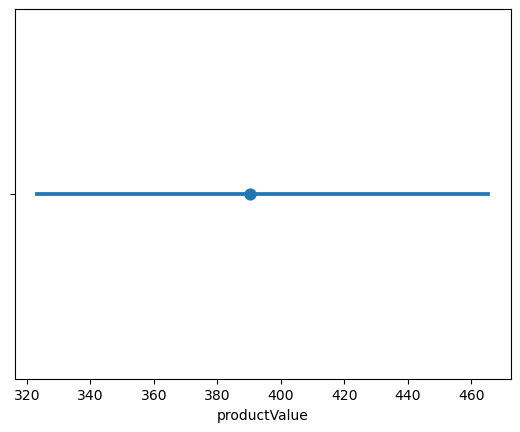

In [13]:
# Afficher les valeurs sur l'axe des abscisses 'x' = nomColonne
sns.pointplot(x = "productValue", data = dataframe)

<Axes: ylabel='productValue'>

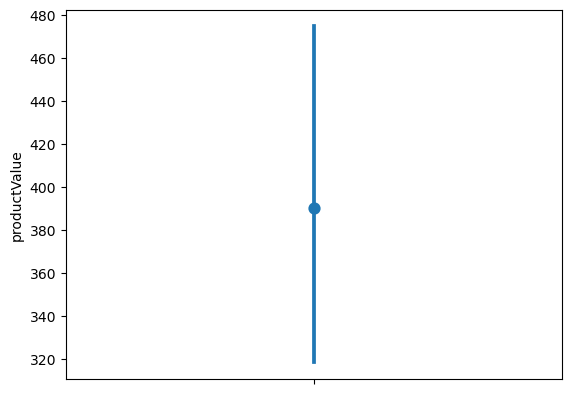

In [12]:
# Afficher les valeurs sur l'axe des ordonnées 'y' = nomColonne
sns.pointplot(y = "productValue", data = dataframe)

# Croiser une variable quantitative (ordonnées) avec une variable catégorielle (abscisses)

In [3]:
# importation des données d'un tableur Excel
dataframe = pd.read_excel("Maths.xlsx")
dataframe.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,Note1,Note2,Note_finale
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school       397 non-null    object
 1   sex          397 non-null    object
 2   age          397 non-null    int64 
 3   address      397 non-null    object
 4   famsize      397 non-null    object
 5   Pstatus      397 non-null    object
 6   Medu         397 non-null    int64 
 7   Fedu         397 non-null    int64 
 8   Mjob         397 non-null    object
 9   Fjob         397 non-null    object
 10  reason       397 non-null    object
 11  guardian     397 non-null    object
 12  traveltime   397 non-null    int64 
 13  studytime    397 non-null    int64 
 14  failures     397 non-null    int64 
 15  schoolsup    397 non-null    object
 16  famsup       397 non-null    object
 17  paid         397 non-null    object
 18  activities   397 non-null    object
 19  nursery      397 non-null    

<Axes: xlabel='sex', ylabel='Note_finale'>

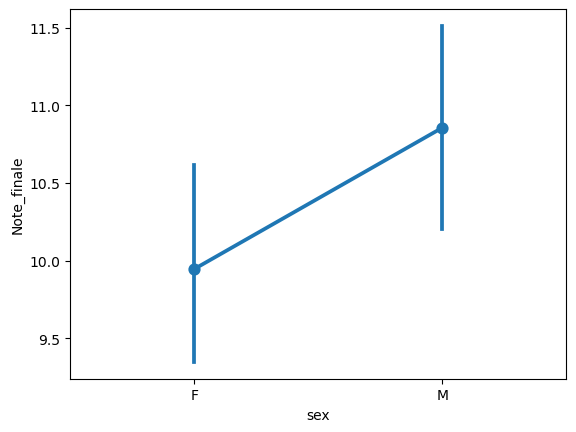

In [5]:
sns.pointplot(x = "sex", y = "Note_finale", data = dataframe)
# En abscisse  : les variables catégorielles (qualitatives)
# En ordonnée : les variables quantitatives
# La bare verticale est l'intervalle de confiance (de niveau 95%) pour la moyenne (cercle au milieu) de la catégorie en abscisse
# On obtient ainsi une comparaison visuelle des moyennes des variables qualitatives.

# La fonction **catplot()** de Seaborn : 

C'est le *couteau* *suisse* des représentations graphiques, qui prend en arguments : 
- x (ou y)  = 'nomColonne' : l'orientation de la représentation de la variable dont la colonne est étiquettée par 'nomColonne' dans la dataframe, selon l'axe des absisses (x) ou l'axe des ordonnées (y)
- data = Dataframe : la dataframe contenant l'étiquette 'nomColonne' de la variable que l'on souhaite représenter
- **kind** = 'typeGraphique' : où 'typeGraphique' est le type de graphique que l'on souhaite représenter
  - 'box' : les boîtes à moustaches
  - 'violin' : pour les violinplots vus précédemment
  - 'strip' : les pseudo-nuage des points
  - 'point' : l'intervalle de confiance pour la moyenne, de niveau 95%
  - 'count' : un histogramme avec en ordonnées les **fréquences absolues**
  - etc..

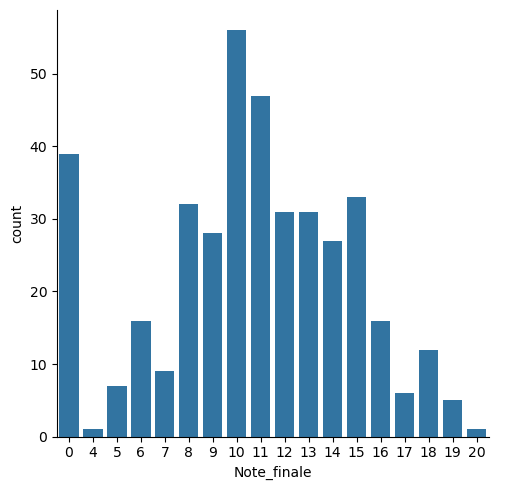

In [6]:
# un histogramme
sns.catplot(x = 'Note_finale', data = dataframe, kind = 'count')

# Graphique d'une distribution deq variables catégorielles (qualitatives)

## 1. Diagramme à barre : les effectis de chaque catégorie

<Axes: xlabel='sex', ylabel='count'>

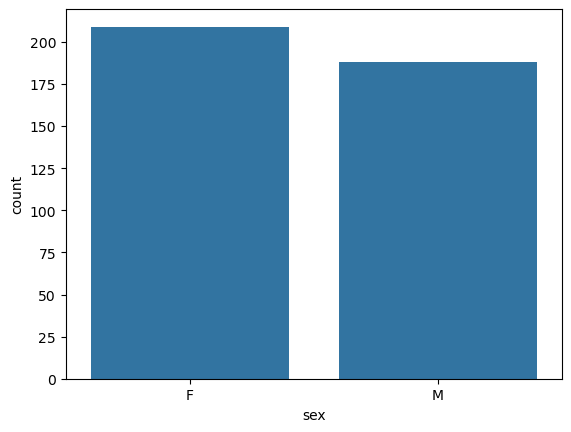

In [7]:
sns.countplot(x = 'sex', data = dataframe)

## Afficher les catégories selon les fréquences relatives (et poucentages)

In [20]:
# créer une table de contingence : tableau croisé des fréquences de chaque catégorie
table_frequence = pd.crosstab(dataframe["sex"], "frequence_relative")
# dataframe["sex"] : la colonne de la veariable qualitative de la dataframe
# 'Fréquence' : Nom de la colonne pour les résultats des effectifs de chaque catégorie
table_frequence

col_0,frequence_relative
sex,
F,209
M,188


In [23]:
# normaliser les fréquences (fréquences relatives) avec 'normalize = True'
table_frequence = pd.crosstab(dataframe["sex"], "frequence_relative", normalize = True)
table_frequence

col_0,frequence_relative
sex,
F,0.526448
M,0.473552


### Les pourcentages

In [24]:
table_pourcentage = table_frequence.assign(pourcentage =  100 * table_frequence["frequence_relative"])
# la méthode 'assign()' de Pandas permet d'ajouter une colonne supplémentaire à une dataframe
# 'pourcentage' est l'étiquette souhaitée pour ma colonne 
table_pourcentage

col_0,frequence_relative,pourcentage
sex,,
F,0.526448,52.644836
M,0.473552,47.355164


<Axes: xlabel='sex', ylabel='pourcentage'>

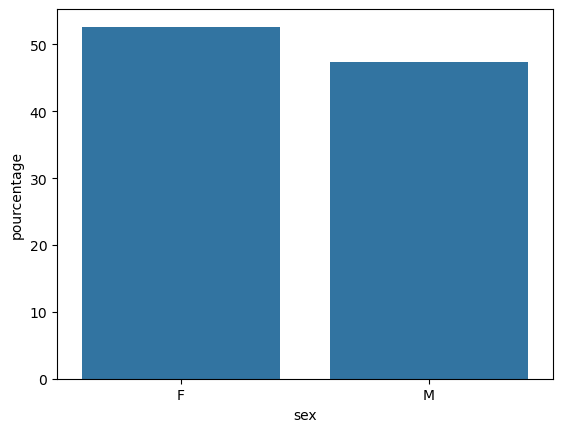

In [25]:
# graphique (diagramme à barre) des pourcentages
sns.barplot(x = "sex", y = "pourcentage", data = table_pourcentage)

<Axes: xlabel='pourcentage', ylabel='sex'>

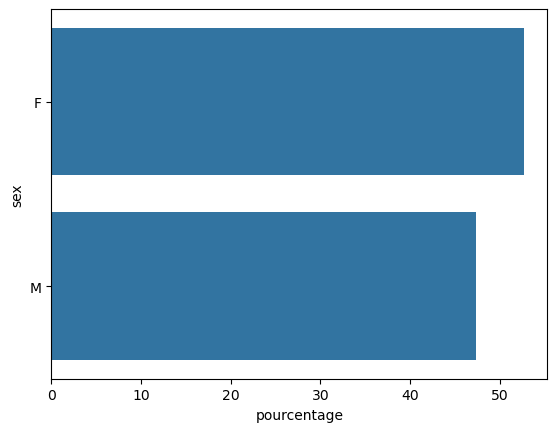

In [26]:
# Diagramme à barre horizontale (en inversant 'x' et 'y')
sns.barplot(x = "pourcentage", y = "sex", data = table_pourcentage)

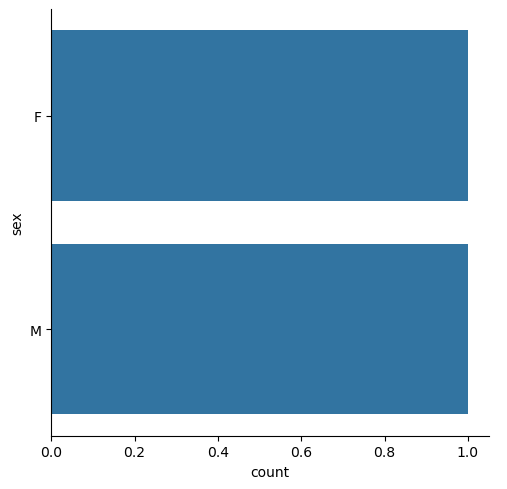

In [28]:
# on peut utiliser 'caplot()' avec l'argument 'kind = count'
sns.catplot(y = "sex", data = table_pourcentage, kind = "count")

# Relations deux à deux entre toutes les variables quantitatives : 
Les variables **catégorielles sont ignorées** et les histogrammes sur la diagonale montrent la distribution de la variable numérique (quantitative)

In [4]:
dataframe2 = dataframe[["sex", "age", "guardian", "absences", "Note_finale"]]
dataframe2.head()

,sex,age,guardian,absences,Note_finale
0,F,18,mother,6,6
1,F,17,father,4,6
2,F,15,mother,10,10
3,F,15,mother,2,15
4,F,16,father,4,10


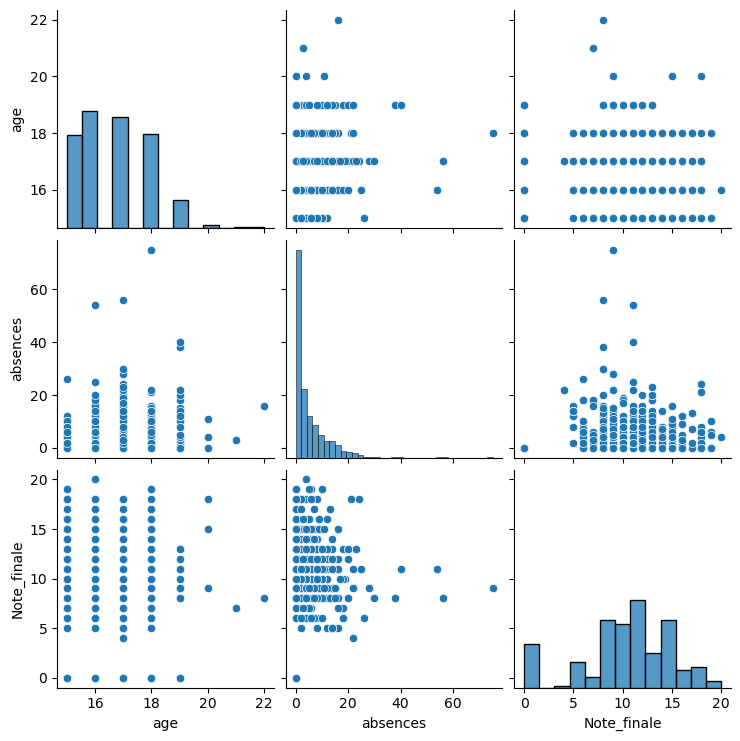

In [36]:
sns.pairplot(dataframe2)

## Différencier les couleurs selon une catégorie : le paramètre **hue**

In [5]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sex          397 non-null    object
 1   age          397 non-null    int64 
 2   guardian     397 non-null    object
 3   absences     397 non-null    int64 
 4   Note_finale  397 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.6+ KB


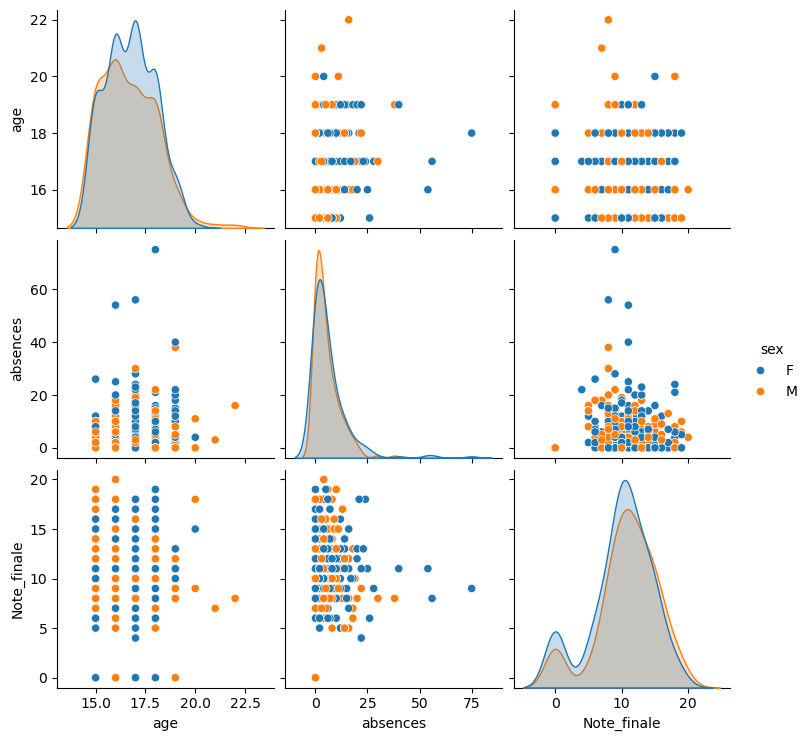

In [7]:
# Différencier selon la variable qualitative 'sex'
sns.pairplot(dataframe2, hue = "sex")

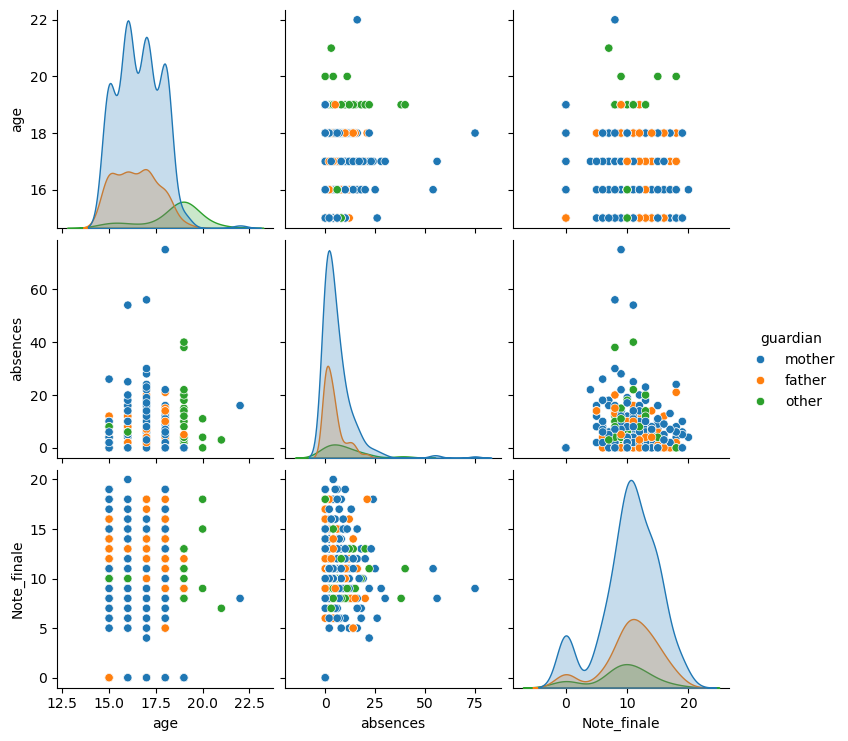

In [8]:
# Différencier selon la variable qualitative 'guardian' (le parent ayant la garde de l'enfant)
sns.pairplot(dataframe2, hue = "guardian")

**Pour** **aller** **plus** **loin...** :Il existe encore d'autres paramètres notamment **size** et **style**, qui sont expliquées dans la documentation de **Seaborn**.

# Relation entre deux variables quantitatives : **jointplot()**

In [9]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sex          397 non-null    object
 1   age          397 non-null    int64 
 2   guardian     397 non-null    object
 3   absences     397 non-null    int64 
 4   Note_finale  397 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.6+ KB


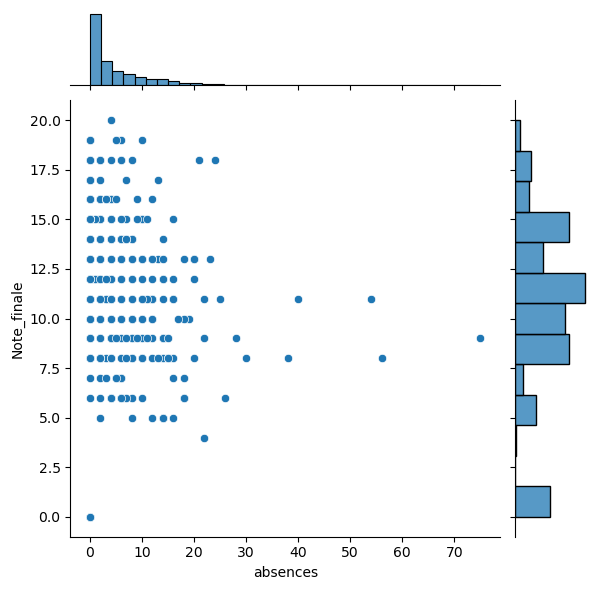

In [13]:
sns.jointplot(x = "absences", y = "Note_finale", data = dataframe2)
# les histogrammes montrent la distribution de chaque varable séparémment
# les points matérialisent la relation entre les deux variables

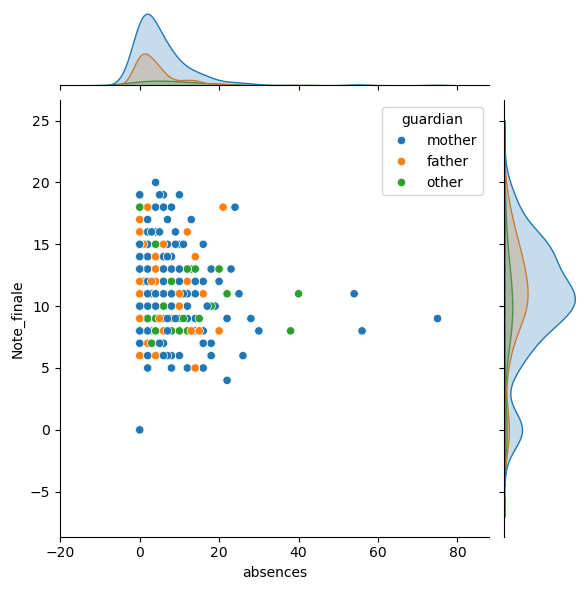

In [14]:
# grouper selon le parent ayant la garde de l'enfant
sns.jointplot(x = "absences", y = "Note_finale", data = dataframe2, hue = "guardian")

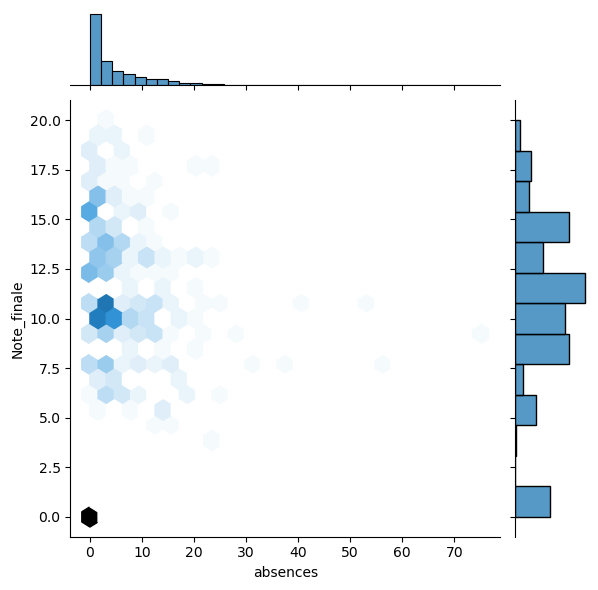

In [16]:
# spécifier le style des points avec le paramètre 'kind'
sns.jointplot(x = "absences", y = "Note_finale", data = dataframe2, kind = "hex")
# hex : affiche une heatmap hexagonale

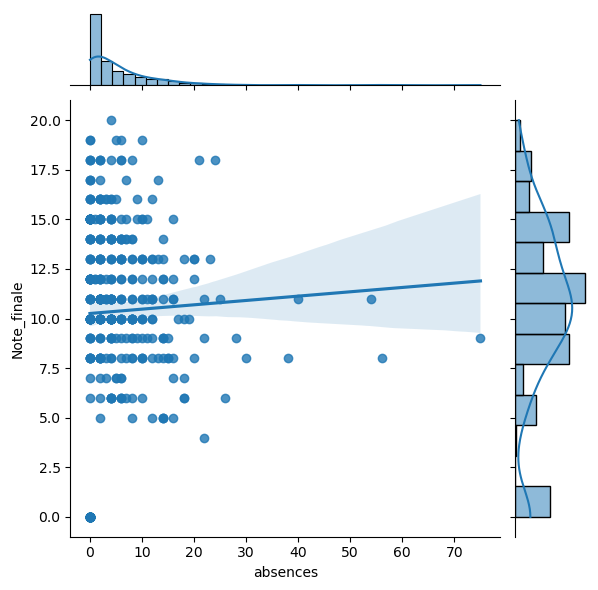

In [17]:
sns.jointplot(x = "absences", y = "Note_finale", data = dataframe2, kind = "reg")
# reg : crée une régression linéaire pour voir la tendance

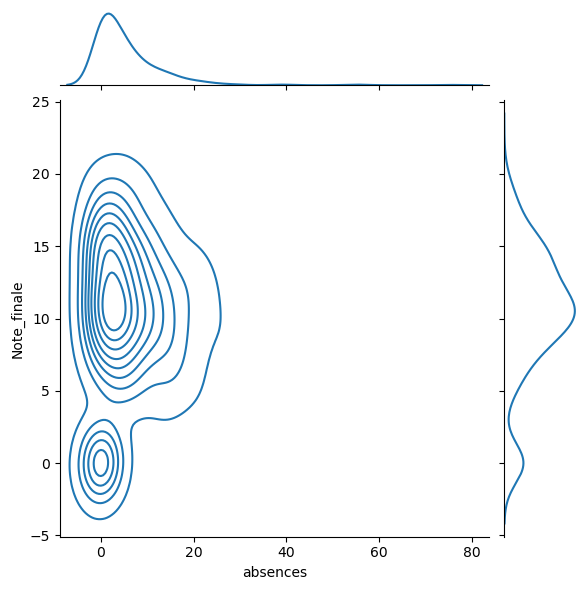

In [18]:
sns.jointplot(x = "absences", y = "Note_finale", data = dataframe2, kind = "kde")
# kde : affiche une densité de probabilité à la place des points

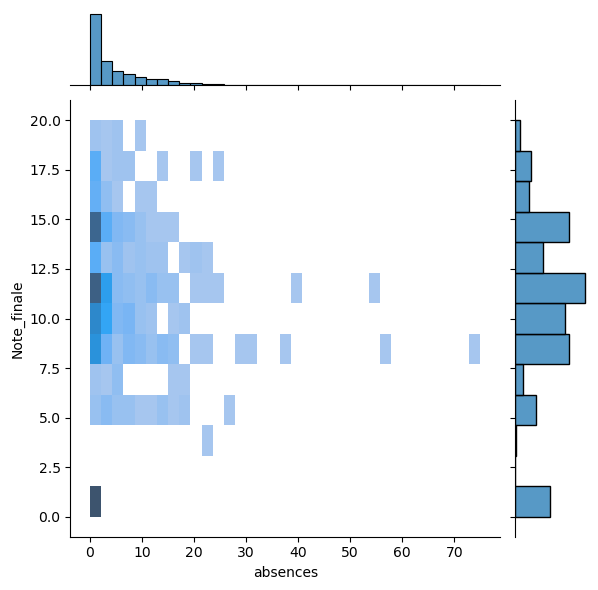

In [19]:
sns.jointplot(x = "absences", y = "Note_finale", data = dataframe2, kind = "hist")
# hist : affiche une heatmap basée sur des histogrammes

# Les heatmap pour les corrélations des variables quantitatives (numériques)

<Axes: >

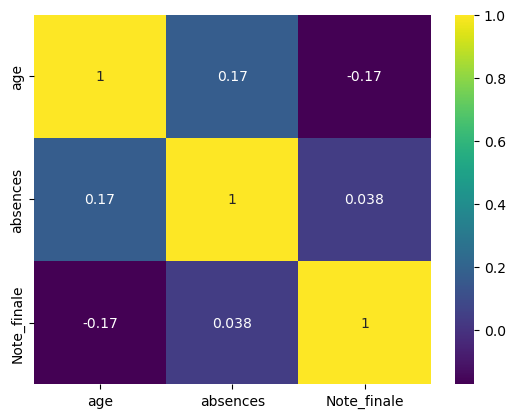

In [21]:
# calcul de la matrice de corrélation (coéfficient de corrélation de Pearson)
matrice = dataframe2.corr(numeric_only = True)
# Affichage de la heatmap
sns.heatmap(matrice, annot = True, cmap = "viridis")
# annot = True : affiche les valeurs de corrélation directement sur le graphique
# cmap : définit le style des couleurs